In [1]:
import sys
print(sys.executable)
from xgboost import XGBClassifier
print("XGBoost imported successfully!")

c:\Users\mr027\anaconda3\python.exe
XGBoost imported successfully!


In [5]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Shape of features:", X.shape)
print("Shape of labels:", y.shape)
print("\nSample features:\n", X[:5])
print("\nSample labels:", y[:5])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Shape of features: (150, 4)
Shape of labels: (150,)

Sample features:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Sample labels: [0 0 0 0 0]


In [ ]:
# Step 3: Initialize All Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "SVM": SVC()
}

In [ ]:
# Step 4: Train and Evaluate Each Model
results = {}

for name, model in models.items():
    print("========================================")
    print(f"Model: {name}")
    print("========================================")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print("Accuracy:", round(acc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Model: Naive Bayes
Accuracy: 0.9778
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


In [ ]:
# Step 5: Compare All Model Accuracies
df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("===== MODEL ACCURACY COMPARISON =====")
print(df_results)

===== MODEL ACCURACY COMPARISON =====
                 Model  Accuracy
0  Logistic Regression  1.000000
1          Naive Bayes  0.977778
2        Decision Tree  1.000000
3        Random Forest  1.000000
4              XGBoost  1.000000
5                  SVM  1.000000


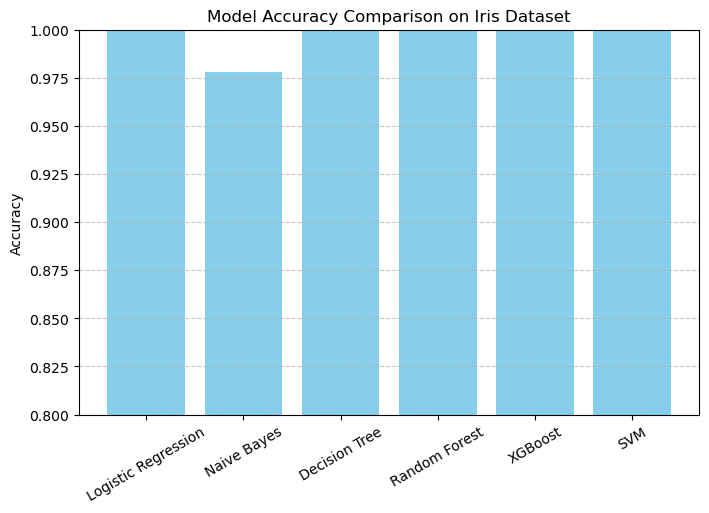

In [ ]:
# Step 6: Visualize Accuracy Comparison
plt.figure(figsize=(8,5))
plt.bar(df_results["Model"], df_results["Accuracy"], color="skyblue")
plt.title("Model Accuracy Comparison on Iris Dataset")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
